First Data Science Project - Uraih

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd

In [2]:
SAT = pd.read_csv("/Users/Chudi8GB/Desktop/REPII/project-1/data/sat.csv", index_col=0)

In [3]:
ACT = pd.read_csv("/Users/Chudi8GB/Desktop/REPII/project-1/data/act.csv", index_col=0)

##### 2. Print the first ten rows of each dataframe.

In [4]:
SAT.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
SAT.tail()


,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,65%,561,541,1102
47,Washington,64%,541,534,1075
48,West Virginia,14%,558,528,1086
49,Wisconsin,3%,642,649,1291
50,Wyoming,3%,626,604,1230


In [6]:
ACT.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [7]:
ACT.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


##### 3. Describe in words what each variable (column) is.

In [ ]:
'''
For the SAT dataframe, 
State - State where student took the SAT test.
Participation - Percentage of eligible highschool students that take the SAT.
Evidence-Based Reading and Writing - The average score for the state on the Evidence-Based Reading and Writing section 
of the SAT.
Math - The average score for the state on the Math section of the SAT.
Total - The average combined SAT score for the state. 
'''

In [ ]:
'''
For the ACT dataframe
State - The state where the student took the ACT.
Participation - Percentage of eligible highschool students that take the SAT.
English - The average score for the english test on the ACT.
Math - The average score for the math test on the ACT.
Reading - The average score for the reading test on the ACT.
Science - The average score for the science test on the ACT.
Composite - The average of your four test scores, rounded to the nearest whole number.
'''

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [8]:
ACT.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.2+ KB


In [ ]:
ACT.isnull()

In [9]:
SAT.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


In [ ]:
'''
The data has a complete listing of values. 
The Participation column type for both dataframes are listed as strings.  
They will need conversion prior to analysis.
'''

##### 5. Print the types of each column.

In [10]:
ACT.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [11]:
SAT.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [ ]:
#The Participaton columns for both dataframes need to be reassigned to floats.

In [14]:
ACT['Participation_%'] = ACT['Participation'].apply(lambda x: x[:-1]) #Slicing the % off every column

ACT['Participation_%'] = ACT['Participation_%'].astype(float) #Converting str to a float


ACT.dtypes #Confirming change

State               object
Participation       object
English            float64
Math               float64
Reading            float64
Science            float64
Composite          float64
Participation_%    float64
dtype: object

In [13]:
SAT['Participation_%'] = SAT['Participation'].apply(lambda x: x[:-1]) #Slicing the % off every column

SAT['Participation_%'] = SAT['Participation_%'].astype(int) #Converting str to a int

SAT.dtypes #Confirming change

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
Participation_%                        int64
dtype: object

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [15]:
dict_ACT_Part =ACT.set_index('State')['Participation_%'].to_dict()
dict_ACT_English = ACT.set_index('State')['English'].to_dict()
dict_ACT_Math = ACT.set_index('State')['Math'].to_dict()
dict_ACT_Reading = ACT.set_index('State')['Reading'].to_dict()
dict_ACT_Science = ACT.set_index('State')['Science'].to_dict()
dict_ACT_Composite = ACT.set_index('State')['Composite'].to_dict()


In [16]:
dict_SAT_Part =SAT.set_index('State')['Participation_%'].to_dict()
dict_SAT_EBRW = SAT.set_index('State')['Evidence-Based Reading and Writing'].to_dict()
dict_SAT_Math = SAT.set_index('State')['Math'].to_dict()



##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.


In [91]:
print(ACT.values[:5])

[['Alabama' 18.9 18.4 19.7 19.4 19.2 100.0]
 ['Alaska' 18.7 19.8 20.4 19.9 19.8 65.0]
 ['Arizona' 18.6 19.8 20.1 19.8 19.7 62.0]
 ['Arkansas' 18.9 19.0 19.7 19.5 19.4 100.0]
 ['California' 22.5 22.7 23.1 22.2 22.8 31.0]]


In [101]:
dic_data = {}

for idx, col in enumerate(ACT.columns):

    dic_data[col] = []
    for rows in ACT.values:
        dic_data[col].append(rows[idx])


##### 9. Merge the dataframes on the state column.

In [21]:
ACT = ACT.loc[1:,:] #Removed national data so that it isn't averaged within the statistics.

In [22]:
new_df = pd.merge(ACT, SAT, how = 'outer')

new_df

,State,Participation,English,Math,Reading,Science,Composite,Participation_%,Evidence-Based Reading and Writing,Total
0,Alabama,100%,18.9,18.4,19.7,19.4,19.2,100.0,NaN,NaN
1,Alaska,65%,18.7,19.8,20.4,19.9,19.8,65.0,NaN,NaN
2,Arizona,62%,18.6,19.8,20.1,19.8,19.7,62.0,NaN,NaN
3,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,100.0,NaN,NaN
4,California,31%,22.5,22.7,23.1,22.2,22.8,31.0,NaN,NaN
5,Colorado,100%,20.1,20.3,21.2,20.9,20.8,100.0,NaN,NaN
6,Connecticut,31%,25.5,24.6,25.6,24.6,25.2,31.0,NaN,NaN
7,Delaware,18%,24.1,23.4,24.8,23.6,24.1,18.0,NaN,NaN
8,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2,32.0,NaN,NaN
9,Florida,73%,19.0,19.4,21.0,19.4,19.8,73.0,NaN,NaN


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [23]:
# df.rename(columns={'Leader': 'Commander'}, inplace=True)
#new_dfII = new_df 
#new_dfII.rename(columns = {'English':'ACT_English', 'Reading':'ACT_Reading', 'Science':'ACT_Science', 
                         #'Composite':'ACT_Composite', 'Evidence-Based Reading and Writing':'SAT_EBRW', 'Total':'SAT_Total'}, inplace=True)
#new_dfII
#ACT.columns


ACT.rename(columns = {'English':'ACT_English', 'Math': 'ACT_Math', 'Reading':'ACT_Reading', 'Science':'ACT_Science',
       'Composite':'ACT_Composite', 'Participation_%':'ACT_Participation_%'}, inplace=True)

SAT.rename(columns = {'Evidence-Based Reading and Writing':'SAT_EBRW', 'Math':'SAT_Math',
       'Total':'SAT_Total', 'Participation_%':'SAT_Participation_%'},inplace=True)



In [24]:
del ACT['Participation']

del SAT['Participation']



In [25]:
Testing_combo_data = pd.merge(ACT, SAT, how = 'outer')
Testing_combo_data

,State,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,ACT_Participation_%,SAT_EBRW,SAT_Math,SAT_Total,SAT_Participation_%
0,Alabama,18.9,18.4,19.7,19.4,19.2,100.0,593,572,1165,5
1,Alaska,18.7,19.8,20.4,19.9,19.8,65.0,547,533,1080,38
2,Arizona,18.6,19.8,20.1,19.8,19.7,62.0,563,553,1116,30
3,Arkansas,18.9,19.0,19.7,19.5,19.4,100.0,614,594,1208,3
4,California,22.5,22.7,23.1,22.2,22.8,31.0,531,524,1055,53
5,Colorado,20.1,20.3,21.2,20.9,20.8,100.0,606,595,1201,11
6,Connecticut,25.5,24.6,25.6,24.6,25.2,31.0,530,512,1041,100
7,Delaware,24.1,23.4,24.8,23.6,24.1,18.0,503,492,996,100
8,District of Columbia,24.4,23.5,24.9,23.5,24.2,32.0,482,468,950,100
9,Florida,19.0,19.4,21.0,19.4,19.8,73.0,520,497,1017,83


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [26]:
Testing_combo_data.describe()

,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,ACT_Participation_%,SAT_EBRW,SAT_Math,SAT_Total,SAT_Participation_%
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,20.931373,21.182353,22.013725,21.450980,21.519608,65.254902,569.117647,556.882353,1126.098039,39.803922
std,2.353677,1.981989,2.067271,1.739353,2.020695,32.140842,45.666901,47.121395,92.494812,35.276632
min,16.300000,18.000000,18.100000,18.200000,17.800000,8.000000,482.000000,468.000000,950.000000,2.000000
25%,19.000000,19.400000,20.450000,19.950000,19.800000,31.000000,533.500000,523.500000,1055.500000,4.000000
50%,20.700000,20.900000,21.800000,21.300000,21.400000,69.000000,559.000000,548.000000,1107.000000,38.000000
75%,23.300000,23.100000,24.150000,23.200000,23.600000,100.000000,613.000000,599.000000,1212.000000,66.000000
max,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [ ]:
#Find the mean.
#Take the difference of each observation and the mean.
#Square each result from 2.
#Sum each result from 3.
#Divide the result in 4. by n, where  nn  is the number of observations.
#Take the square root of the result in 5.

In [27]:
import numpy as np

def stnd_dev(test): #Returns the standard deviation of a numeric list
    mn = np.mean(test)
    variance = sum([(i-mn)**2 for i in test]) / len(test) 
    return variance ** .5



In [28]:
#stnd_dev(ACT.columns)
sd_ACT = [stnd_dev(Testing_combo_data['ACT_English']),
stnd_dev(Testing_combo_data['ACT_Math']),
stnd_dev(Testing_combo_data['ACT_Reading']),
stnd_dev(Testing_combo_data['ACT_Science']),
stnd_dev(Testing_combo_data['ACT_Composite']),
stnd_dev(Testing_combo_data['ACT_Participation_%'])]

In [116]:
SAT['SAT_EBRW'] = SAT['SAT_EBRW'].astype(float)
SAT['SAT_Math'] = SAT['SAT_Math'].astype(float)
SAT['SAT_Total'] = SAT['SAT_Total'].astype(float)
SAT['SAT_Participation_%'] = SAT['SAT_Participation_%'].astype(float)

SAT.dtypes #Confirming change

State                   object
SAT_EBRW               float64
SAT_Math               float64
SAT_Total              float64
SAT_Participation_%    float64
dtype: object

In [30]:
#stnd_dev(SAT.columns)
sd_SAT =[stnd_dev(SAT['SAT_EBRW']),stnd_dev(SAT['SAT_Math']),stnd_dev(SAT['SAT_Total']),stnd_dev(SAT['SAT_Participation_%'])]

In [113]:
#myList.append(["a", "true"])
sd = ['None']

sd.append([sd_ACT])

sd.append([sd_SAT])

sd

['None',
 [[2.3304876369363363,
   1.9624620273436781,
   2.0469029314842646,
   1.7222161451443676,
   2.0007860815819889,
   31.824175751231806]],
 [[45.216970204378661,
   46.65713364485503,
   91.583510567787428,
   34.929070766645083]]]

## Step 2: Manipulate the dataframe

In [125]:
sd

flatten = lambda sd: [item for sublist in sd for item in sublist]


SD_Test = pd.DataFrame(sd) #Turn sd list into a dataframe.

SD_Test



,0
0,None
1,"[[2.33048763694, 1.96246202734, 2.04690293148,..."
2,"[[45.2169702044, 46.6571336449, 91.5835105678,..."


In [171]:
 import itertools
mergedA = list(itertools.chain.from_iterable([sd_ACT]))
mergedB  = list(itertools.chain.from_iterable([sd_SAT]))
sd = ["None"]

MERGED = sd+mergedA+mergedB


SD_df = pd.DataFrame(MERGED)

SD_DF = SD_df.transpose()



##### 13. Turn the list `sd` into a new observation in your dataset.

In [170]:
SD_DF.shape

(1, 11)

In [172]:
Testing_combo_data.shape

(51, 11)

In [182]:

#result = pd.concat([Testing_combo_data, SD_DF])

result  = pd.concat([Testing_combo_data, SD_DF], axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

/Users/Chudi8GB/anaconda/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [33]:
#df.sort_values(by='reports', ascending=0)
Testing_combo_data.sort_values(by=['ACT_Participation_%','ACT_Composite'])
    
    

,State,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,ACT_Participation_%,SAT_EBRW,SAT_Math,SAT_Total,SAT_Participation_%
19,Maine,24.2,24.0,24.8,23.7,24.3,8.0,513,499,1012,95
7,Delaware,24.1,23.4,24.8,23.6,24.1,18.0,503,492,996,100
29,New Hampshire,25.4,25.1,26.0,24.9,25.5,18.0,532,520,1052,96
39,Rhode Island,24.0,23.3,24.7,23.4,24.0,21.0,539,524,1062,71
38,Pennsylvania,23.4,23.4,24.2,23.3,23.7,23.0,540,531,1071,65
20,Maryland,23.3,23.1,24.2,23.2,23.6,28.0,536,524,1060,69
47,Washington,20.9,21.9,22.1,22.0,21.9,29.0,541,534,1075,64
45,Vermont,23.3,23.1,24.4,23.2,23.6,29.0,562,551,1114,60
46,Virginia,23.5,23.3,24.6,23.5,23.8,29.0,561,541,1102,65
22,Michigan,24.1,23.7,24.5,23.8,24.1,29.0,509,495,1005,100


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [184]:
#View Rows Where Coverage Is Greater Than 50

Testing_combo_data[Testing_combo_data['SAT_Participation_%'] > 50]


SyntaxError: invalid syntax (<ipython-input-184-97d40a2606a1>, line 3)

## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [44]:

import matplotlib.pyplot as plt
%matplotlib inline


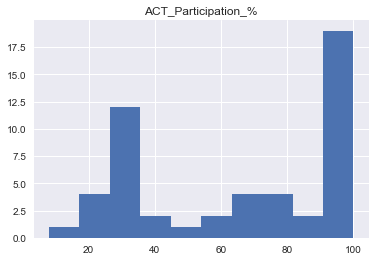

In [50]:
Testing_combo_data['ACT_Participation_%'].hist(bins=10);
plt.title('ACT_Participation_%')


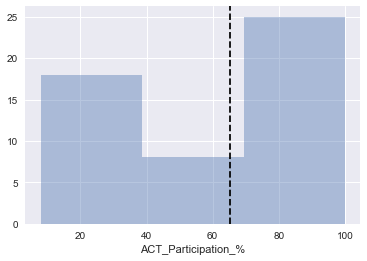

In [46]:
import seaborn as sns #Comparing chart to a seaborn chart
sns.set()

sns.distplot(Testing_combo_data['ACT_Participation_%'], kde=False);
plt.axvline(65.153846, color="k", linestyle="--");

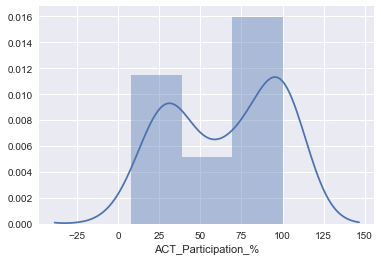

In [47]:
sns.distplot(Testing_combo_data['ACT_Participation_%']) #Comparing chart to a seaborn chart

In [51]:
Testing_combo_data['ACT_Participation_%'].describe()

count     51.000000
mean      65.254902
std       32.140842
min        8.000000
25%       31.000000
50%       69.000000
75%      100.000000
max      100.000000
Name: ACT_Participation_%, dtype: float64

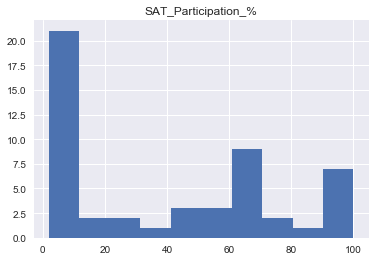

In [52]:
Testing_combo_data['SAT_Participation_%'].hist(bins=10);
plt.title('SAT_Participation_%')

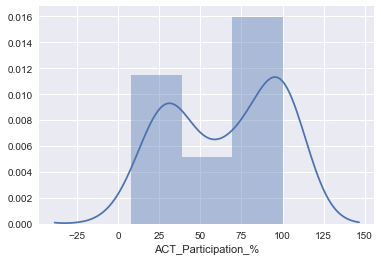

In [53]:
sns.distplot(Testing_combo_data['ACT_Participation_%'])

In [54]:
Testing_combo_data['SAT_Participation_%']

0       5
1      38
2      30
3       3
4      53
5      11
6     100
7     100
8     100
9      83
10     61
11     55
12     93
13      9
14     63
15      2
16      4
17      4
18      4
19     95
20     69
21     76
22    100
23      3
24      2
25      3
26     10
27      3
28     26
29     96
30     70
31     11
32     67
33     49
34      2
35     12
36      7
37     43
38     65
39     71
40     50
41      3
42      5
43     62
44      3
45     60
46     65
47     64
48     14
49      3
50      3
Name: SAT_Participation_%, dtype: int64

In [55]:
Testing_combo_data['SAT_Participation_%'].describe()

count     51.000000
mean      39.803922
std       35.276632
min        2.000000
25%        4.000000
50%       38.000000
75%       66.000000
max      100.000000
Name: SAT_Participation_%, dtype: float64

##### 17. Plot the Math(s) distributions from both data sets.

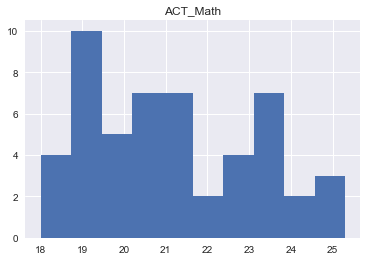

In [56]:
Testing_combo_data['ACT_Math'].hist(bins=10);
plt.title('ACT_Math')

In [57]:
Testing_combo_data['ACT_Math'].describe()

count    51.000000
mean     21.182353
std       1.981989
min      18.000000
25%      19.400000
50%      20.900000
75%      23.100000
max      25.300000
Name: ACT_Math, dtype: float64

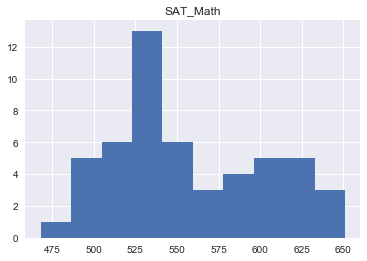

In [58]:
Testing_combo_data['SAT_Math'].hist(bins=10);
plt.title('SAT_Math')

In [59]:
Testing_combo_data['SAT_Math'].describe()

count     51.000000
mean     556.882353
std       47.121395
min      468.000000
25%      523.500000
50%      548.000000
75%      599.000000
max      651.000000
Name: SAT_Math, dtype: float64

##### 18. Plot the Verbal distributions from both data sets.

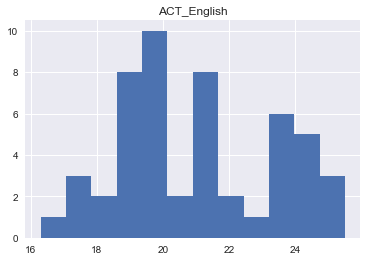

In [60]:
Testing_combo_data['ACT_English'].hist(bins=12);
plt.title('ACT_English')

In [61]:
Testing_combo_data['ACT_English'].describe()

count    51.000000
mean     20.931373
std       2.353677
min      16.300000
25%      19.000000
50%      20.700000
75%      23.300000
max      25.500000
Name: ACT_English, dtype: float64

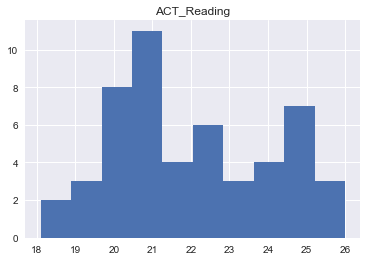

In [62]:
Testing_combo_data['ACT_Reading'].hist(bins=10);
plt.title('ACT_Reading')

In [63]:
Testing_combo_data['ACT_Reading'].describe()

count    51.000000
mean     22.013725
std       2.067271
min      18.100000
25%      20.450000
50%      21.800000
75%      24.150000
max      26.000000
Name: ACT_Reading, dtype: float64

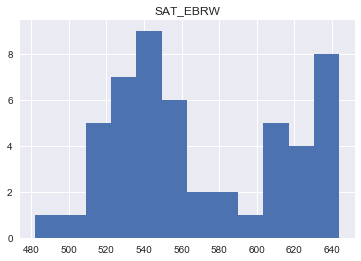

In [64]:
Testing_combo_data['SAT_EBRW'].hist(bins=12);
plt.title('SAT_EBRW')

In [65]:
Testing_combo_data['SAT_EBRW'].describe()

count     51.000000
mean     569.117647
std       45.666901
min      482.000000
25%      533.500000
50%      559.000000
75%      613.000000
max      644.000000
Name: SAT_EBRW, dtype: float64

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

In [ ]:
#I assume that the data is normally distributed.


##### 20. Does this assumption hold true for any of our columns? Which?

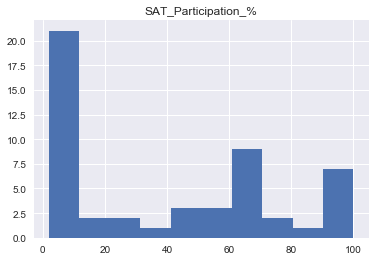

In [68]:
#Testing_combo_data['SAT_Math'].hist(bins=20);
#Testing_combo_data['SAT_EBRW'].hist(bins=20);
#Testing_combo_data['SAT_Total'].hist(bins=20);
Testing_combo_data['SAT_Participation_%'].hist(bins=10);
plt.title('SAT_Participation_%')

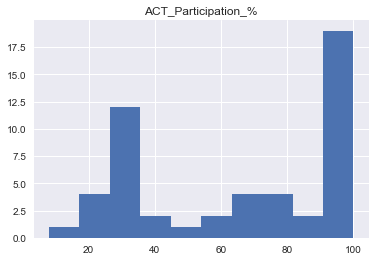

In [69]:
Testing_combo_data['ACT_Participation_%'].hist(bins=10);
plt.title('ACT_Participation_%')

In [ ]:
#It is interesting how participation for both test are almost total opposites. This may the sourse of the two means.
#States with lower participaton may only have students who are taking it for college requirements vs the whole population.
#They may have higher scores on average with to another extrema in the data.
#The data seems consitenlty skewed either to the right or the left. I assume that 'Merica is very polarized when it 
#comes to outomes on standarized test. The data looking like it is being sampled by two different populations.





##### 21. Plot some scatterplots examining relationships between all variables.

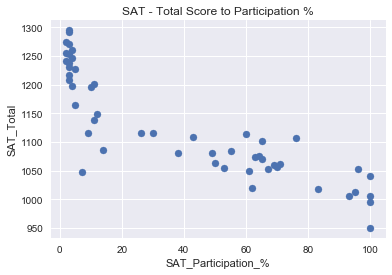

In [70]:
plt.scatter(Testing_combo_data['SAT_Participation_%'],Testing_combo_data['SAT_Total'])
plt.title("SAT - Total Score to Participation %")
plt.xlabel("SAT_Participation_%")
plt.ylabel("SAT_Total");


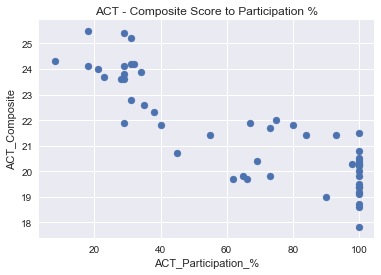

In [71]:
plt.scatter(Testing_combo_data['ACT_Participation_%'],Testing_combo_data['ACT_Composite'])
plt.title("ACT - Composite Score to Participation %")
plt.xlabel("ACT_Participation_%")
plt.ylabel("ACT_Composite");



##### 22. Are there any interesting relationships to note?

In [ ]:
#Both ACT_Composite and SAT_Total data seem inversly propotional to Participation rates. 

##### 23. Create box plots for each variable. 

In [72]:
ACT_ = ACT[['State', 'ACT_English', 'ACT_Math', 'ACT_Reading', 'ACT_Science',
       'ACT_Composite']]

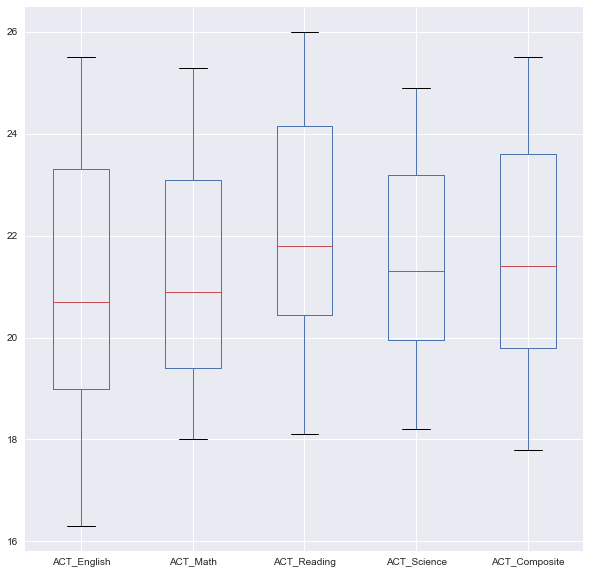

In [73]:
ACT_.boxplot(figsize = (10, 10));

In [74]:
SAT_ = SAT[['State', 'SAT_EBRW', 'SAT_Math', 'SAT_Total']]


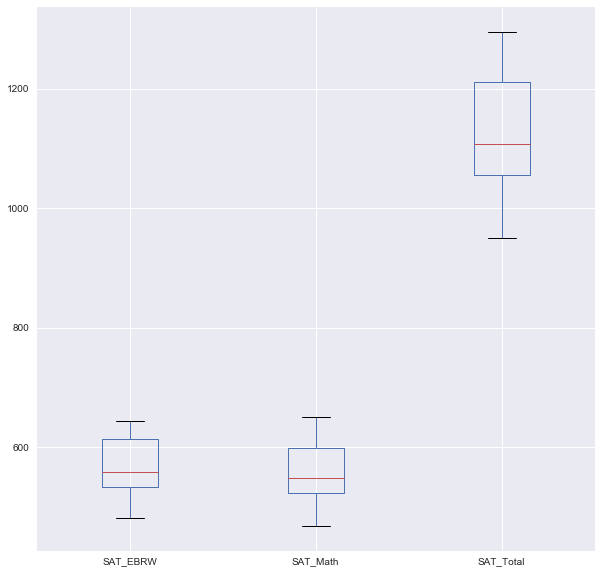

In [75]:
SAT_.boxplot(figsize = (10, 10));

In [76]:
Testing_combo_data_ = Testing_combo_data[['State', 'ACT_Participation_%', 'SAT_Participation_%']]


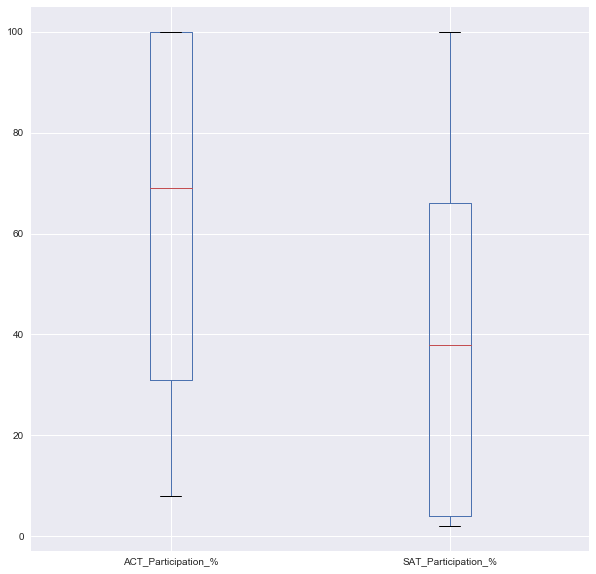

In [77]:
Testing_combo_data_.boxplot(figsize = (10, 10));

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [ ]:
#ACT_Participation_% Histogram
#Shape: This graph has two peaks (bimodal).  This allueds to the two different populations that take the tests. 
#(i.e. the students that its mandatory for and the students that take it for college acceptace)

#Spread:
#std       31.832518
#min        8.000000
#max      100.000000

#Center:
#mean      65.153846

In [ ]:
#SAT_Participation_% Histogram

#Shape: This graph has two peaks (bimodal).  This allueds to the two different populations that take the tests. 
#(i.e. the students that its mandatory for and the students that take it for college acceptace)

#Spread:
#std       35.276632
#min        2.000000
#max      100.000000

#Center:
#mean      39.803922

In [ ]:
#ACT_Math Histogram

#Shape: This graph has two peaks (bimodal).  This allueds to the two different populations that take the tests. 
#(i.e. the students that its mandatory for and the students that take it for college acceptace)

#Spread:
#std       1.963602
#min      18.000000
#max      25.300000

#Center:
#mean     21.173077

In [ ]:
#SAT_Math Histogram

#Shape: This graph has two peaks (bimodal).  This allueds to the two different populations that take the tests. 
#(i.e. the students that its mandatory for and the students that take it for college acceptace)

#Spread:
#std       47.121395
#min      468.000000
#max      651.000000

#Center:
#mean     556.882353



In [ ]:
#ACT_English

#Shape: This graph has two peaks (bimodal).  This allueds to the two different populations that take the tests. 
#(i.e. the students that its mandatory for and the students that take it for college acceptace)

#Spread

#std       2.332132
#min      16.300000
#max      25.500000

#Center:
#mean     20.919231

In [ ]:
#ACT_Reading

#Shape: This graph has two peaks (bimodal).  This allueds to the two different populations that take the tests. 
#(i.e. the students that its mandatory for and the students that take it for college acceptace)

#Spread:

#std       2.048672
#min      18.100000
#max      26.000000

#Center:
#mean     22.001923

In [ ]:
#SAT_Evidence-Based Reading and Writing

#Shape: This graph has two peaks (bimodal).  This allueds to the two different populations that take the tests. 
#(i.e. the students that its mandatory for and the students that take it for college acceptace)

#Spread:
#std       45.666901
#min      482.000000
#max      644.000000

#Center:
#mean     569.117647



##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [ ]:
#Both ACT_Composite and SAT_Total data seem inversly propotional to Participation rates. 

In [78]:
data = Testing_combo_data[['SAT_Participation_%','SAT_Total']]
SAT_correlation = data.corr(method='pearson')

print(SAT_correlation)

                     SAT_Participation_%  SAT_Total
SAT_Participation_%              1.00000   -0.86754
SAT_Total                       -0.86754    1.00000


In [ ]:
#np.corrcoef(Testing_combo_data['SAT_Participation_%'][0:], Testing_combo_data['SAT_Total'][0:], rowvar=False)

In [79]:
data = Testing_combo_data[['ACT_Participation_%','ACT_Composite']]
ACT_correlation = data.corr(method='pearson')

print(ACT_correlation)

                     ACT_Participation_%  ACT_Composite
ACT_Participation_%             1.000000      -0.858134
ACT_Composite                  -0.858134       1.000000


##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [ ]:
A = ACT.loc[1:,['State', 'ACT_Participation_%']] 


In [80]:
import scipy.stats as stats
conf_level = 0.95
mean_SAT_Part = 39.803922
sigma_SAT_Part = 35.276632

mean_ACT_Part = 65.153846
sigma_ACT_Part = 31.832518

#stats.t.interval(alpha = 0.99,                # Confidence level
#                 df = 49,                     # Degrees of freedom
#                loc = minnesota_ages.mean(), # Sample mean
#                 scale= sigma)                # Standard dev estimate

In [86]:
#SAT Participation Rates
stats.t.interval(alpha = 0.05, df = 50,loc = mean_SAT_Part,scale=sigma_SAT_Part)       



(37.580706620022895, 42.027137379977106)

In [88]:
#ACT Participation Rates
stats.t.interval(alpha = 0.05, df = 50,loc = mean_ACT_Part,scale=sigma_ACT_Part) 



(63.147686693153524, 67.160005306846472)

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [84]:
#SAT Participation Rates
stats.norm.interval(conf_level, loc=mean_SAT_Part, scale=sigma_SAT_Part)

#The data isn't normally distributed so the values are outside of the range of posibility.

(-29.337006215873174, 108.94485021587317)

In [85]:
#ACT Participation Rates
stats.norm.interval(conf_level, loc=mean_ACT_Part, scale=sigma_ACT_Part)

#The data isn't normally distributed so the values are outside of the range of posibility.

(2.7632571827770107, 127.54443481722299)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

In [ ]:
#Yes.  The values are larger than the scale when stats.norm.interval is used. 
#I exlpected for the test using 95% confidence to have a broader range but something realistic.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [ ]:
# I don't think that is appropriate to correlate the two test. Though they both test math, they have different populations
#taking the test. States don't share the same mandatory tests.

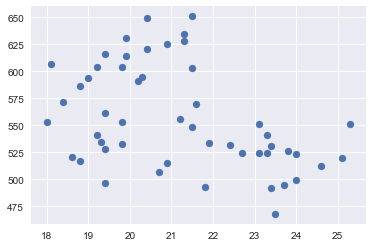

In [89]:
plt.scatter(Testing_combo_data['ACT_Math'],Testing_combo_data['SAT_Math']);

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

In [ ]:
#No. With the data that we have, we cannot accurately infer how the greater population would look.
#We do know that if the test was mandatory, the means for both test would drop.